# Задание

Набор данных ex5data1.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются линейно разделимыми.

Набор данных ex5data2.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные являются нелинейно разделимыми.

Набор данных ex5data3.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит три переменные X1 и X2 (независимые переменные) и y (метка класса). Данные разделены на две выборки: обучающая выборка (X, y), по которой определяются параметры модели; валидационная выборка (Xval, yval), на которой настраивается коэффициент регуляризации и параметры Гауссового ядра.

Набор данных spamTrain.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные X - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и y - метка класса: 0 - не спам, 1 - спам. Набор используется для обучения классификатора.

Набор данных spamTest.mat представляет собой файл формата *.mat (т.е. сохраненного из Matlab). Набор содержит две переменные Xtest - вектор, кодирующий отсутствие (0) или присутствие (1) слова из словаря vocab.txt в письме, и ytest - метка класса: 0 - не спам, 1 - спам. Набор используется для проверки качества классификатора.

1. Загрузите данные ex5data1.mat из файла.
2. Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.
3. Обучите классификатор с помощью библиотечной реализации SVM с линейным ядром на данном наборе.
4. Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?
5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.
6. Загрузите данные ex5data2.mat из файла.
7. Обработайте данные с помощью функции Гауссового ядра.
8. Обучите классификатор SVM.
9. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).
10. Загрузите данные ex5data3.mat из файла.
11. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке.
12. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).
13. Загрузите данные spamTrain.mat из файла.
14. Обучите классификатор SVM.
15. Загрузите данные spamTest.mat из файла.
16. Подберите параметры C и σ2.
17. Реализуйте функцию предобработки текста письма, включающую в себя:
a) перевод в нижний регистр;
b) удаление HTML тэгов;
c) замена URL на одно слово (например, “httpaddr”);
d) замена email-адресов на одно слово (например, “emailaddr”);
e) замена чисел на одно слово (например, “number”);
f) замена знаков доллара ($) на слово “dollar”;
g) замена форм слов на исходное слово (например, слова “discount”, “discounts”, “discounted”, “discounting” должны быть h) заменены на слово “discount”). Такой подход называется stemming;
h) остальные символы должны быть удалены и заменены на пробелы, т.е. в результате получится текст, состоящий из слов, разделенных пробелами.
18. Загрузите коды слов из словаря vocab.txt.
19. Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.
20. Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах spamTrain.mat и spamTest.mat).
21. Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.
22. Также можете проверить его работу на собственных примерах.
23. Создайте свой набор данных из оригинального корпуса текстов - http://spamassassin.apache.org/old/publiccorpus/.
24. Постройте собственный словарь.
25. Как изменилось качество классификации? Почему?

In [20]:
import re
import email
import os

import pandas as pd
import numpy as np

from scipy import io
from nltk.stem import PorterStemmer

import matplotlib.pyplot as plt
%matplotlib inline

1. Загрузите данные ex5data1.mat из файла.

In [10]:
ex5data1 = io.loadmat('Data/Lab 5/ex5data1.mat')
ex5data1_df = pd.DataFrame({"x1": ex5data1['X'][:, 0], "x2": ex5data1['X'][:, 1], "y": ex5data1['y'].flatten()})
ex5data1_df.head()

,x1,x2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


2. Постройте график для загруженного набора данных: по осям - переменные X1, X2, а точки, принадлежащие различным классам должны быть обозначены различными маркерами.

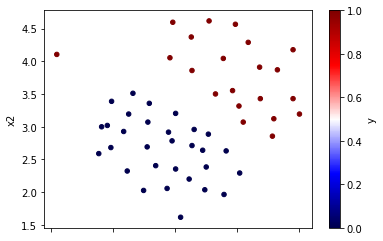

In [19]:
ex5data1_df.plot(kind='scatter', x='x1', y='x2', c='y', cmap='seismic')
plt.show()

4. Постройте разделяющую прямую для классификаторов с различными параметрами C = 1, C = 100 (совместно с графиком из пункта 2). Объясните различия в полученных прямых?

In [21]:
from sklearn.svm import SVC

In [24]:
svc_c1 = SVC(kernel='linear', C=1).fit(ex5data1_df[['x1', 'x2']], ex5data1_df['y'])
svc_c100 = SVC(kernel='linear', C=100).fit(ex5data1_df[['x1', 'x2']], ex5data1_df['y'])

In [37]:
def get_meshgrid(x1, x2, n=250):
    l1 = np.linspace(x1.min(), x1.max(), n).T
    l2 = np.linspace(x2.min(), x2.max(), n).T
    return np.meshgrid(l1, l2)

xx1, xx2 = get_meshgrid(ex5data1_df['x1'], ex5data1_df['x2'])
xx = np.c_[xx1.flatten(), xx2.flatten()]

svc_c1_pred = svc_c1.predict(xx)
svc_c100_pred = svc_c100.predict(xx)

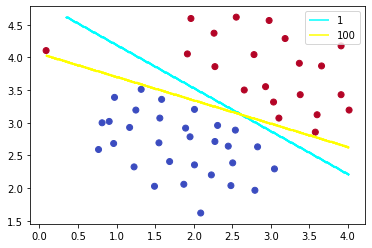

In [46]:
fig, ax = plt.subplots()
plt.scatter(x=ex5data1_df['x1'], y=ex5data1_df['x2'], 
            c=ex5data1_df['y'], 
            cmap='coolwarm')

con1 = ax.contour(xx1, xx2, svc_c1_pred.reshape(xx1.shape), colors='cyan')
con100 = ax.contour(xx1, xx2, svc_c100_pred.reshape(xx1.shape), colors='yellow')

lines = [con1.collections[0], con100.collections[0]]
labels = ['1','100']

plt.legend(lines, labels)
plt.show()

Получили разные разделяющие прямые тк на их положение в пространстве влияет параметр регуляризации C

5. Реализуйте функцию вычисления Гауссового ядра для алгоритма SVM.

In [96]:
def gauss_kernel(x1, x2, s=0.01):
    x1 = x1.flatten()
    x2 = x2.flatten()
    return np.exp(-np.sum(np.power(x1 - x2, 2)) / (2.0*s))

6. Загрузите данные ex5data2.mat из файла.

In [50]:
ex5data2 = io.loadmat('Data/Lab 5/ex5data2.mat')
ex5data2_df = pd.DataFrame({"x1": ex5data2['X'][:, 0], "x2": ex5data2['X'][:, 1], "y": ex5data2['y'].flatten()})
ex5data2_df.head()

,x1,x2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


7. Обработайте данные с помощью функции Гауссового ядра.

In [52]:
def gauss_kernel_preprocess(X1, X2, s=0.01):
    result = np.zeros((X1.shape[0], X2.shape[0]))
    
    for i, x1 in enumerate(X1):
        for j, x2 in enumerate(X2):
            result[i, j] = gauss_kernel(x1, x2, s)

    return result

preprocessed_data = gauss_kernel_preprocess(ex5data2['X'], ex5data2['X'])
preprocessed_data.shape

(863, 863)

8. Обучите классификатор SVM.

In [58]:
svc2 = SVC(C=100, kernel='precomputed').fit(preprocessed_data, ex5data2['y'].flatten())

9. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

In [68]:
# Applying kernel trick
xx1, xx2 = get_meshgrid(ex5data2_df['x1'], ex5data2_df['x2'], 100)
X = ex5data2['X']

preds = np.zeros(xx1.shape)
for i in range(xx1.shape[1]):
    new_X = np.column_stack((xx1[:, i], xx2[:, i]))
    preds[:, i] = svc2.predict(gauss_kernel_preprocess(new_X, X))

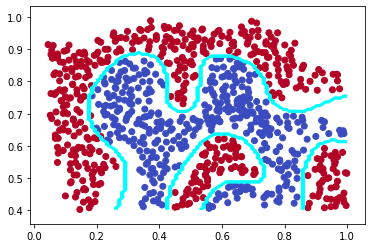

In [74]:
plt.scatter(x=ex5data2_df['x1'], y=ex5data2_df['x2'], c=ex5data2_df['y'], cmap='coolwarm')
plt.contour(xx1, xx2, preds, colors='cyan')
plt.show()

10. Загрузите данные ex5data3.mat из файла.

In [70]:
ex5data3 = io.loadmat('Data/Lab 5/ex5data3.mat')

X, Xval = ex5data3['X'], ex5data3['Xval']
y, yval = ex5data3['y'].flatten(), ex5data3['yval'].flatten()

11. Вычислите параметры классификатора SVM на обучающей выборке, а также подберите параметры C и σ2 на валидационной выборке.

In [78]:
def select_best_model(X, Xval, y, yval):
    preprocessed_fit_data = gauss_kernel_preprocess(X, X)
    best_svc = None
    min_number_of_errors = None

    for C in (0.01, 1, 10, 25, 100):
        for s in (0.0001, 0.0025, 0.01, 0.25, 1, 25):
            svc = SVC(C=C, kernel='precomputed')
            svc.fit(preprocessed_fit_data, y)

            predictions = svc.predict(gauss_kernel_preprocess(Xval, X, s))
            number_of_errors = sum(predictions != yval)

            if min_number_of_errors is None or number_of_errors < min_number_of_errors:
                best_svc = svc
                min_number_of_errors = number_of_errors

            print('C={}, s={}, val accuracy = {}'.format(C, s, sum(predictions == yval) / len(yval)))

    return best_svc

best_model = select_best_model(X, Xval, y, yval)
best_model

C=0.01, s=0.0001, val accuracy = 0.435
C=0.01, s=0.0025, val accuracy = 0.435
C=0.01, s=0.01, val accuracy = 0.435
C=0.01, s=0.25, val accuracy = 0.435
C=0.01, s=1, val accuracy = 0.435
C=0.01, s=25, val accuracy = 0.435
C=1, s=0.0001, val accuracy = 0.47
C=1, s=0.0025, val accuracy = 0.845
C=1, s=0.01, val accuracy = 0.965
C=1, s=0.25, val accuracy = 0.89
C=1, s=1, val accuracy = 0.88
C=1, s=25, val accuracy = 0.76
C=10, s=0.0001, val accuracy = 0.465
C=10, s=0.0025, val accuracy = 0.76
C=10, s=0.01, val accuracy = 0.94
C=10, s=0.25, val accuracy = 0.915
C=10, s=1, val accuracy = 0.915
C=10, s=25, val accuracy = 0.73
C=25, s=0.0001, val accuracy = 0.47
C=25, s=0.0025, val accuracy = 0.72
C=25, s=0.01, val accuracy = 0.94
C=25, s=0.25, val accuracy = 0.92
C=25, s=1, val accuracy = 0.92
C=25, s=25, val accuracy = 0.675
C=100, s=0.0001, val accuracy = 0.475
C=100, s=0.0025, val accuracy = 0.78
C=100, s=0.01, val accuracy = 0.94
C=100, s=0.25, val accuracy = 0.925
C=100, s=1, val accuracy

SVC(C=1, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='precomputed', max_iter=-1, probability=False, random_state=None,
    shrinking=True, tol=0.001, verbose=False)

12. Визуализируйте данные вместе с разделяющей кривой (аналогично пункту 4).

In [80]:
xx1, xx2 = get_meshgrid(X[:,0], X[:,1], 100)

preds = np.zeros(xx1.shape)
for i in range(xx1.shape[1]):
    new_X = np.column_stack((xx1[:, i], xx2[:, i]))
    preds[:, i] = best_model.predict(gauss_kernel_preprocess(new_X, X))

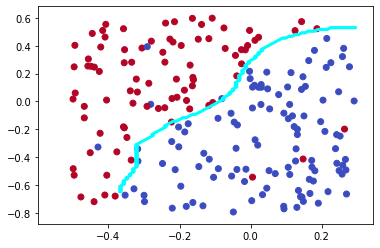

In [81]:
plt.scatter(x=Xval[:,0], y=Xval[:,1], c=yval, cmap='coolwarm')
plt.contour(xx1, xx2, preds, colors='cyan')
plt.show()

13. Загрузите данные spamTrain.mat из файла.

In [84]:
spam_train = io.loadmat('Data/Lab 5/spamTrain.mat')
spam_train['X'].shape

(4000, 1899)

14. Обучите классификатор SVM.

In [88]:
svc_spam = SVC(C=100, gamma="auto").fit(spam_train['X'], spam_train['y'].flatten())

15. Загрузите данные spamTest.mat из файла.

In [93]:
spam_test = io.loadmat('Data/Lab 5/spamTest.mat')

16. Подберите параметры C и σ2.

In [ ]:
svc_spam = select_best_model(spam_train['X'], spam_train['y'].flatten(), spam_test['Xtest'], spam_test['ytest'].flatten())

In [ ]:
predictions = svc_spam.predict(spam_test['Xtest'])
sum(predictions == spam_test['ytest'].flatten()) / len(spam_test['ytest'])

17. Реализуйте функцию предобработки текста письма, включающую в себя:  
перевод в нижний регистр;  
удаление HTML тэгов;  
замена URL на одно слово (например, “httpaddr”);  
замена email-адресов на одно слово (например, “emailaddr”);  
замена чисел на одно слово (например, “number”);  
замена знаков доллара ($) на слово “dollar”;  
замена форм слов на исходное слово (например, слова “discount”, “discounts”, “discounted”, “discounting” должны быть заменены на слово “discount”).

Такой подход называется stemming;  
остальные символы должны быть удалены и заменены на пробелы, т.е. в результате получится текст, состоящий из слов, разделенных пробелами.


In [111]:
def email_preprocess(email_text):
    email_text = email_text.lower()
    email_text = re.sub('<[^<>]+>', ' ', email_text)
    email_text = re.sub('[0-9]+', 'number', email_text)
    email_text = re.sub('(http|https)://[^\s]*', 'httpaddr', email_text)
    email_text = re.sub('[^\s]+@[^\s]+', 'emailaddr', email_text)
    email_text = re.sub('[$]+', 'dollar', email_text)
    email_text = re.split(r'[@$/#.-:&\*\+=\[\]?!(){},\'\'\">_<;%\s\n\r\t]+', email_text)
    
    return [PorterStemmer().stem(token.strip()) for token in email_text if len(token) > 1]

18. Загрузите коды слов из словаря vocab.txt.

In [112]:
with open('Data/Lab 5/vocab.txt', 'r') as f:
    vocab = {}
    
    for line in f.readlines():
        i, word = line.split()
        vocab[word] = int(i)

19. Реализуйте функцию замены слов в тексте письма после предобработки на их соответствующие коды.

In [113]:
def replace_words_with_codes(email_text, vocab):
    return [vocab[i] for i in email_preprocess(email_text) if vocab.get(i)]

20. Реализуйте функцию преобразования текста письма в вектор признаков (в таком же формате как в файлах spamTrain.mat и spamTest.mat).

In [114]:
def make_vector(codes, vocab):
    vector = np.zeros(len(vocab))
    for i in codes:
        vector[i-1] = 1
        
    return vector

21. Проверьте работу классификатора на письмах из файлов emailSample1.txt, emailSample2.txt, spamSample1.txt и spamSample2.txt.

In [461]:
def get_email_features(f_name):
    with open(f_name) as f:
        email_text = ''.join(f.readlines())

        return make_vector(replace_words_with_codes(email_text, vocab), vocab)
    
print(svc_spam.predict([get_email_features('Data/Lab 5/emailSample1.txt')]),
      svc_spam.predict([get_email_features('Data/Lab 5/emailSample2.txt')]),
      svc_spam.predict([get_email_features('Data/Lab 5/spamSample1.txt')]),
      svc_spam.predict([get_email_features('Data/Lab 5/spamSample2.txt')]))

[0] [0] [1] [1]
